In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [41]:
df = pd.read_csv(r"C:\Users\Kaybee\Videos\Internship_hamoyeHQ\Social_Network_Ads.csv")
# df.head()
# df.describe()
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


#### Create visualizations

In [18]:
gender_plt = df.groupby('Gender').count()
gender_plt

,User ID,Age,EstimatedSalary,Purchased
Gender,,,,
0,196,196,196,196
1,204,204,204,204


<Figure size 500x600 with 0 Axes>

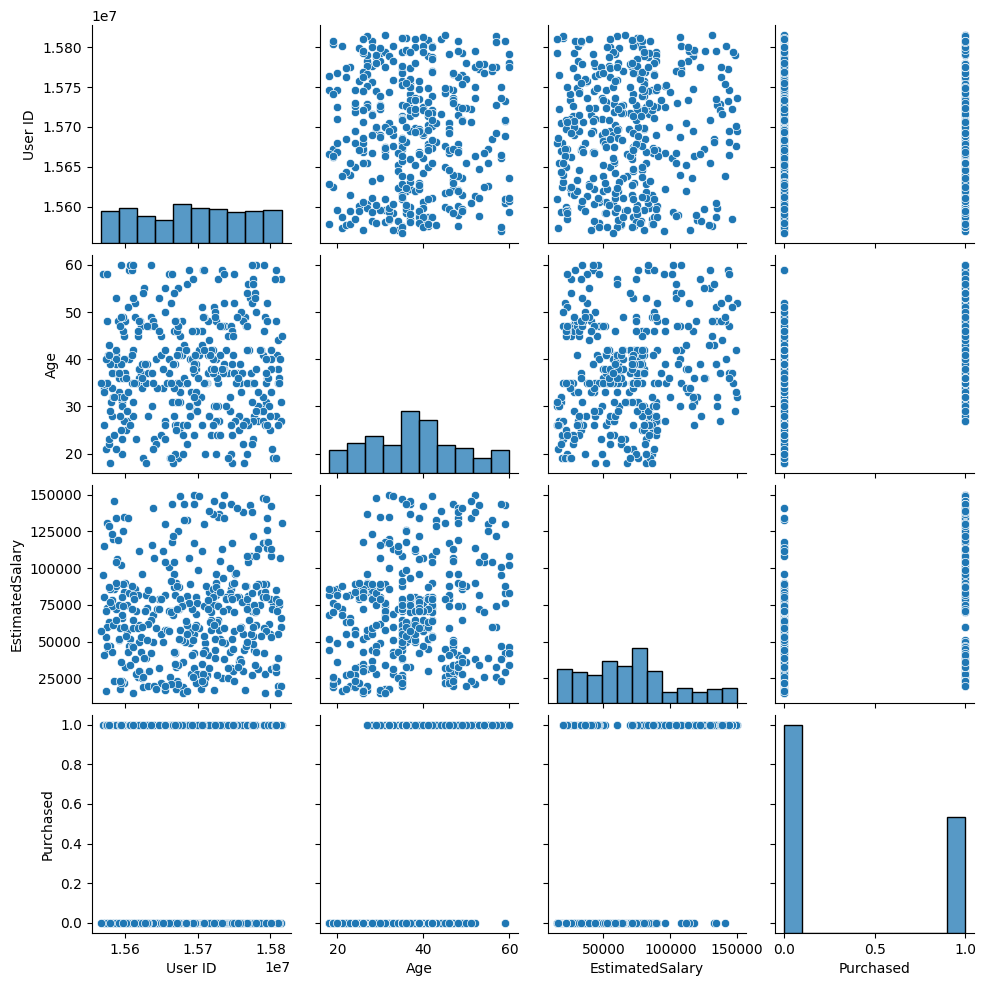

In [87]:
plt.figure(figsize=(5,6))
sns.pairplot(df)

Text(0.5, 1.0, 'count of purchases')

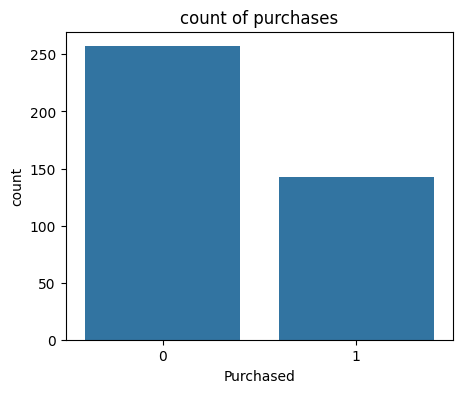

In [97]:
plt.figure(figsize=(5, 4))

sns.countplot(df, x= 'Purchased')
plt.title("count of purchases")


In [94]:
encoder = LabelEncoder()
label = {"Male" : 0, "Female": 1}
df["Gender"].replace(label, inplace = True)
# df = df.drop(columns="encoded_label")
df

C:\Users\Kaybee\AppData\Local\Temp\ipykernel_10892\4199216296.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].replace(label, inplace = True)
C:\Users\Kaybee\AppData\Local\Temp\ipykernel_10892\4199216296.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"].replace(label, 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


<Axes: >

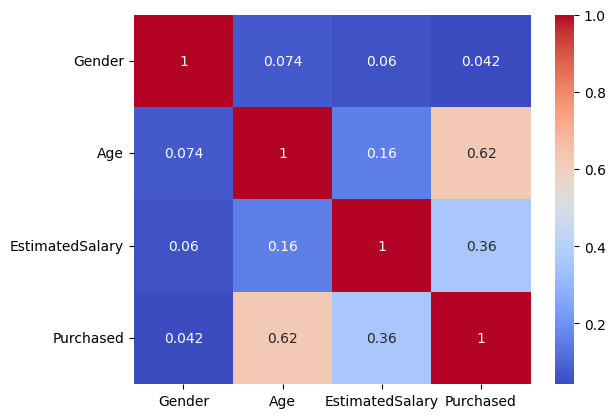

In [40]:
data_corr = df.drop(columns='User ID').corr()
sns.heatmap(data_corr,annot=True, cmap = 'coolwarm')


<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

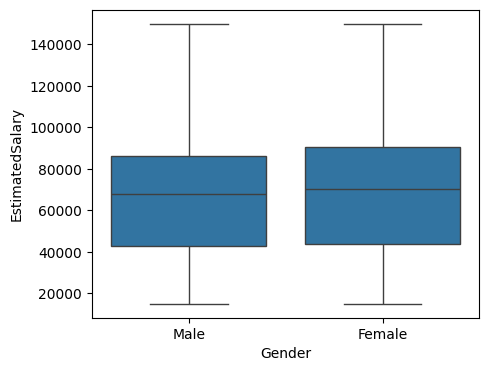

In [58]:
plt.figure(figsize=(5,4))
sns.boxplot(df, x= 'Gender', y='EstimatedSalary')

#### Train and Test the model

0.8583333333333333


Text(0.5, 1.0, 'Confusion Matrix')

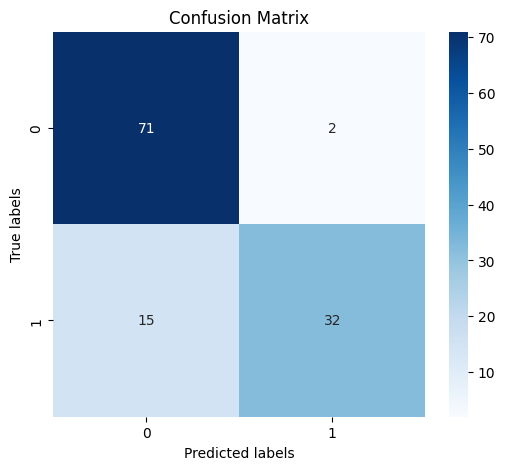

In [96]:
# df = df.drop(columns="User ID")
X = df.drop(columns=['Purchased'])
y = df['Purchased']
X, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled =  scaler.transform(X_test)
model = LogisticRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
print(accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))
cnf_ma = confusion_matrix(y_test, y_pred)
cnf_ma
plt.figure(figsize=(6, 5))
sns.heatmap(cnf_ma, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
# print(classification_report(y_test, y_pred))

<Axes: >

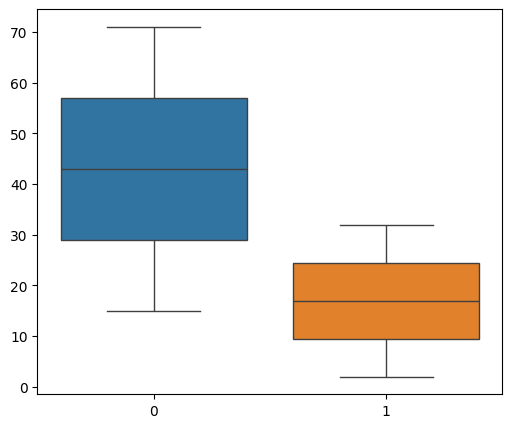

In [47]:
plt.figure(figsize=(6,5))
sns.boxplot(cnf_ma)